# Eperiment 4

- find the global best model for the dataset



In [1]:
import pandas as pd 
import numpy as np

In [2]:
exp1_df=pd.read_csv("../result/exp1.csv")
exp2_df=pd.read_csv("../result/exp2.csv")
exp3_df=pd.read_csv("../result/exp3.csv")


In [3]:
exp2_df['normalisation']='standard'
exp3_df['normalisation']='standard'
exp1_df['model']+="_exp_1"
exp2_df['model']+="_exp_2"
exp3_df['model']+="_exp_3"





In [5]:
exp=pd.concat((exp1_df,exp2_df,exp3_df))

In [6]:
exp

,model,accuracy,auc,f1_score,cm,training_time(ms),testing_time(ms),normalisation
0,LogisticRegression_exp_1,0.831522,0.836934,0.847291,[[67 10]\n [21 86]],53.141594,1.994848,without
1,SVC_exp_1,0.684783,0.687098,0.712871,[[54 23]\n [35 72]],32.946348,19.329548,without
2,DecisionTreeClassifier_exp_1,0.804348,0.813570,0.818182,[[67 10]\n [26 81]],6.979704,3.436804,without
3,RandomForestClassifier_exp_1,0.896739,0.898471,0.909091,[[70 7]\n [12 95]],238.950253,8.750916,without
4,GradientBoostingClassifier_exp_1,0.869565,0.871465,0.884615,[[68 9]\n [15 92]],191.018343,1.994848,without
5,HistGradientBoostingClassifier_exp_1,0.853261,0.859267,0.866995,[[69 8]\n [19 88]],473.515511,0.000000,without
6,BaggingClassifier_exp_1,0.820652,0.829409,0.834171,[[68 9]\n [24 83]],62.511921,5.492687,without
7,AdaBoostClassifier_exp_1,0.836957,0.841607,0.852941,[[67 10]\n [20 87]],111.458302,13.316631,without
8,LogisticRegression_exp_1,0.847826,0.854594,0.861386,[[69 8]\n [20 87]],3.949642,0.000000,minmax
9,SVC_exp_1,0.836957,0.832504,0.859813,[[62 15]\n [15 92]],34.428358,9.973526,minmax


In [7]:
exp[exp.auc==exp.auc.max()]

,model,accuracy,auc,f1_score,cm,training_time(ms),testing_time(ms),normalisation
2,Voting (xgb+rfc)_exp_3,0.907609,0.907816,0.919431,[[70 7]\n [10 97]],368.053675,14.972448,standard


In [8]:
exp[exp['training_time(ms)']==exp['training_time(ms)'].max()]

,model,accuracy,auc,f1_score,cm,training_time(ms),testing_time(ms),normalisation
7,stacking (rfc+gbc+xgb)_exp_3,0.896739,0.894829,0.910798,[[68 9]\n [10 97]],2750.690937,35.861969,standard


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

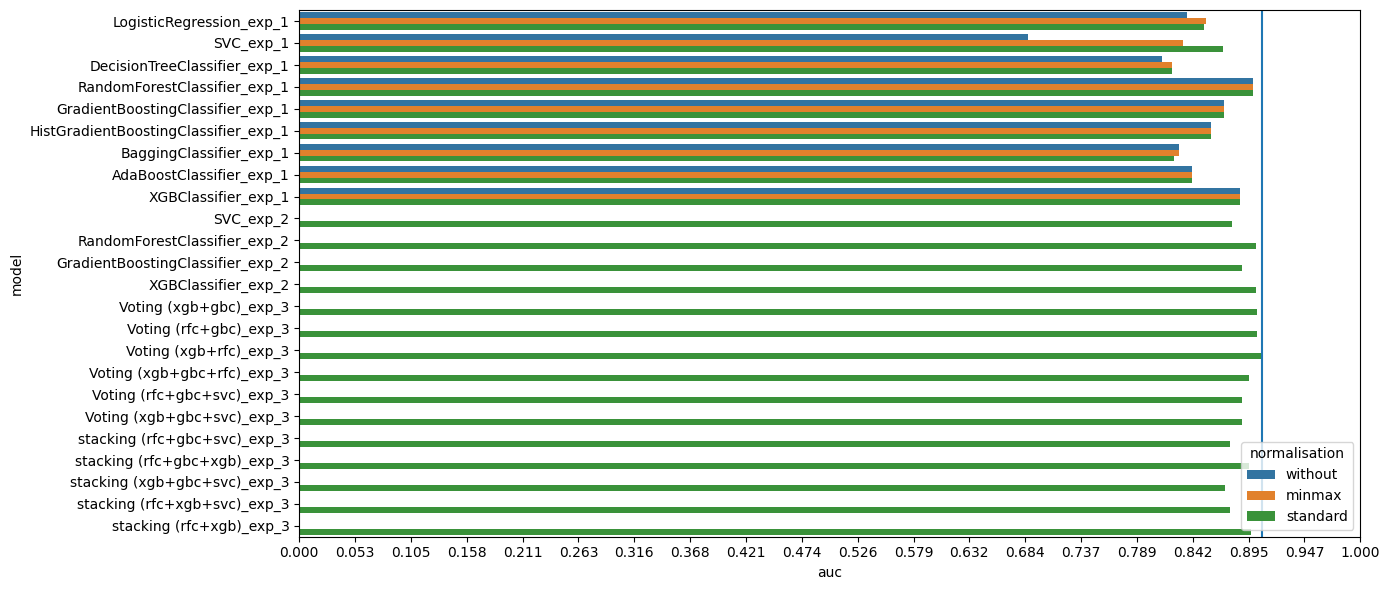

In [9]:
plt.figure(figsize=(14,6))
sns.barplot(exp,y='model',x='auc',orient='h',errorbar=None,hue='normalisation')
plt.xticks(np.linspace(0,1,20))
plt.axvline(x=exp['auc'].max())
plt.tight_layout()
plt.show()


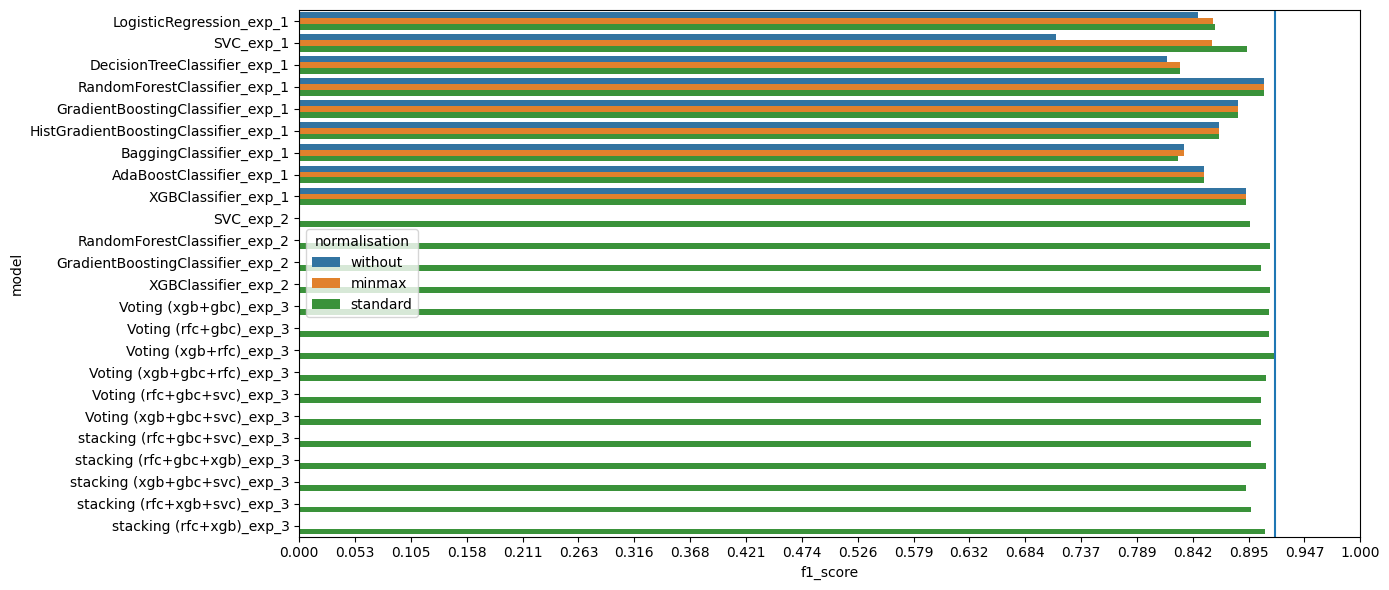

In [10]:
plt.figure(figsize=(14,6))
sns.barplot(exp,y='model',x='f1_score',orient='h',errorbar=None,hue='normalisation',)
plt.xticks(np.linspace(0,1,20))
plt.axvline(x=exp['f1_score'].max())
plt.tight_layout()
plt.show()

In [11]:
best_models=exp[exp.auc==exp.auc.max()]

In [12]:
best_models

,model,accuracy,auc,f1_score,cm,training_time(ms),testing_time(ms),normalisation
2,Voting (xgb+rfc)_exp_3,0.907609,0.907816,0.919431,[[70 7]\n [10 97]],368.053675,14.972448,standard


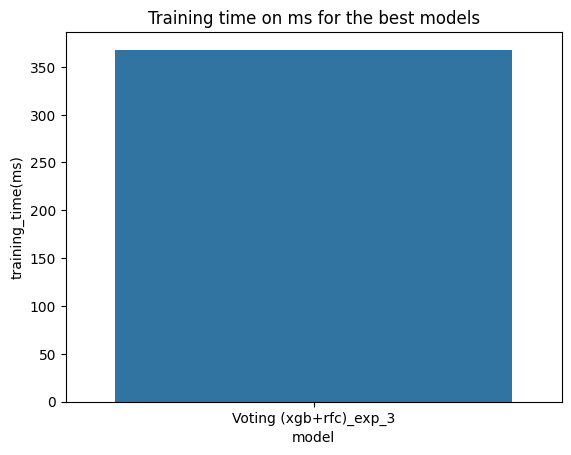

In [13]:
plt.title("Training time on ms for the best models")
sns.barplot(best_models,y='training_time(ms)',x='model');


## best model


- VotingClassifier (Random Forest + XGBClassifier )


In [14]:
from sklearn.ensemble import RandomForestClassifier
import json
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier 


In [28]:
df=pd.read_csv('../data/cleaned_data.csv')
X_train,X_test,y_train,y_test=train_test_split(df.drop('target',axis=1),df.target,test_size=0.2,random_state=42)
scaler=StandardScaler()
scaler.fit(X_train)
X_train=pd.DataFrame(scaler.transform(X_train),columns=scaler.get_feature_names_out())
X_test=pd.DataFrame(scaler.transform(X_test),columns=scaler.get_feature_names_out())


In [29]:
with open('../result/rfc_best_hyperparameters.json') as f :
    rfc_best_params=json.load(f)
with open('../result/xgbc_best_hyperparameters.json') as f :
    xgbc_best_params=json.load(f)

In [30]:
rfc = RandomForestClassifier(**rfc_best_params).fit(X_train,y_train)
xgb = XGBClassifier(**xgbc_best_params).fit(X_train,y_train)


In [31]:
features_importances_rfc=pd.DataFrame({
    'features':X_train.columns,
    'importance':rfc.feature_importances_
})
features_importances_xgbc=pd.DataFrame({
    'features':X_train.columns,
    'importance':xgb.feature_importances_
})


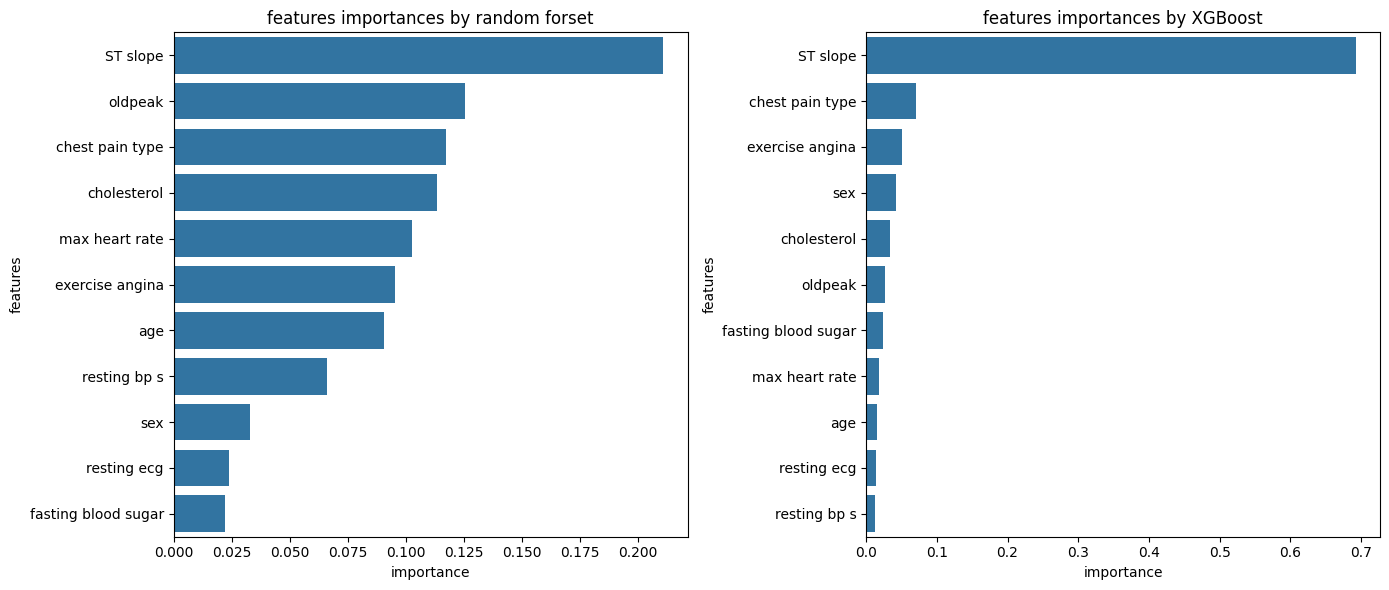

In [32]:
plt.figure(figsize=(14,6))
plt.subplot(1 , 2 ,1 )
sns.barplot(features_importances_rfc.sort_values(by='importance',ascending=False),x='importance',y='features')
plt.title("features importances by random forset");
plt.subplot(1 , 2 ,2 )
sns.barplot(features_importances_xgbc.sort_values(by='importance',ascending=False),x='importance',y='features')
plt.title("features importances by XGBoost")
plt.tight_layout();

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier

In [37]:
vc = VotingClassifier([('xgb',xgb),('rfc',rfc)]).fit(X_train,y_train)

In [39]:
roc_auc_score(y_test,vc.predict(X_test))

0.9078164825828378